# Import and setup

In [126]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import missingno as msno
import xarray as xr

In [127]:
path_data = "../data/"

# Download Dataset

In [128]:
datacube = xr.open_dataset(path_data + "datacube.nc")
datacube = datacube.sel(
    time=slice('2020-01-01', '2020-01-02'))

# Get information on the dataset

In [5]:
datacube.info()

xarray.Dataset {
dimensions:
	x = 298 ;
	y = 253 ;
	time = 367 ;

variables:
	float64 x(x) ;
		x:axis = X ;
		x:long_name = x coordinate of projection ;
		x:standard_name = projection_x_coordinate ;
		x:units = metre ;
	float64 y(y) ;
		y:axis = Y ;
		y:long_name = y coordinate of projection ;
		y:standard_name = projection_y_coordinate ;
		y:units = metre ;
	int32 crs() ;
		crs:crs_wkt = PROJCS["unknown",GEOGCS["unknown",DATUM["unknown",SPHEROID["unknown",6371007.181,0]],PRIMEM["Greenwich",0,AUTHORITY["EPSG","8901"]],UNIT["degree",0.0174532925199433,AUTHORITY["EPSG","9122"]]],PROJECTION["Sinusoidal"],PARAMETER["longitude_of_center",0],PARAMETER["false_easting",0],PARAMETER["false_northing",0],UNIT["metre",1,AUTHORITY["EPSG","9001"]],AXIS["Easting",EAST],AXIS["Northing",NORTH]] ;
		crs:semi_major_axis = 6371007.181 ;
		crs:semi_minor_axis = 6371007.181 ;
		crs:inverse_flattening = 0.0 ;
		crs:reference_ellipsoid_name = unknown ;
		crs:longitude_of_prime_meridian = 0.0 ;
		crs:prime_mer

In [6]:
datacube.head()

<xarray.Dataset>
Dimensions:            (x: 5, y: 5, time: 5)
Coordinates:
  * x                  (x) float64 3.415e+05 3.424e+05 ... 3.442e+05 3.452e+05
  * y                  (y) float64 5.018e+06 5.017e+06 ... 5.015e+06 5.014e+06
    crs                int32 ...
  * time               (time) object 2020-01-01 00:00:00 ... 2020-01-05 00:00:00
    band               int32 ...
Data variables: (12/13)
    ET_500m            (time, y, x) float64 ...
    Fpar_500m          (time, y, x) float64 ...
    spatial_ref        int32 ...
    density            (y, x) float32 ...
    u10                (time, y, x) float64 ...
    v10                (time, y, x) float64 ...
    ...                 ...
    tp                 (time, y, x) float64 ...
    First_Day          (time, y, x) float64 ...
    Last_Day           (time, y, x) float64 ...
    Burn_Date          (time, y, x) float64 ...
    FireMask           (time, y, x) float64 ...
    _1_km_16_days_EVI  (time, y, x) float64 ...
Attributes:
    Conventions:  CF-1.6
    history:      2022-09-15 13:57:35 GMT by grib_to_netcdf-2.25.1: /opt/ecmw...

In [7]:
# transphorm all variable as float
datacubefloat = datacube.astype("float")
datacubefloat.head()

<xarray.Dataset>
Dimensions:            (time: 5, y: 5, x: 5)
Coordinates:
  * x                  (x) float64 3.415e+05 3.424e+05 ... 3.442e+05 3.452e+05
  * y                  (y) float64 5.018e+06 5.017e+06 ... 5.015e+06 5.014e+06
    crs                int32 0
  * time               (time) object 2020-01-01 00:00:00 ... 2020-01-05 00:00:00
    band               int32 1
Data variables: (12/13)
    ET_500m            (time, y, x) float64 nan nan nan nan ... nan nan nan nan
    Fpar_500m          (time, y, x) float64 nan nan nan nan ... nan nan nan nan
    spatial_ref        float64 0.0
    density            (y, x) float64 nan nan nan nan nan ... nan nan nan nan
    u10                (time, y, x) float64 nan nan nan nan ... nan nan nan nan
    v10                (time, y, x) float64 nan nan nan nan ... nan nan nan nan
    ...                 ...
    tp                 (time, y, x) float64 nan nan nan nan ... nan nan nan nan
    First_Day          (time, y, x) float64 nan nan nan nan ... nan nan nan nan
    Last_Day           (time, y, x) float64 nan nan nan nan ... nan nan nan nan
    Burn_Date          (time, y, x) float64 nan nan nan nan ... nan nan nan nan
    FireMask           (time, y, x) float64 nan nan nan nan ... nan nan nan nan
    _1_km_16_days_EVI  (time, y, x) float64 nan nan nan nan ... nan nan nan nan
Attributes:
    Conventions:  CF-1.6
    history:      2022-09-15 13:57:35 GMT by grib_to_netcdf-2.25.1: /opt/ecmw...

# Handle Missing Data

## By collumn

In [8]:
datacube.info()

xarray.Dataset {
dimensions:
	x = 298 ;
	y = 253 ;
	time = 367 ;

variables:
	float64 x(x) ;
		x:axis = X ;
		x:long_name = x coordinate of projection ;
		x:standard_name = projection_x_coordinate ;
		x:units = metre ;
	float64 y(y) ;
		y:axis = Y ;
		y:long_name = y coordinate of projection ;
		y:standard_name = projection_y_coordinate ;
		y:units = metre ;
	int32 crs() ;
		crs:crs_wkt = PROJCS["unknown",GEOGCS["unknown",DATUM["unknown",SPHEROID["unknown",6371007.181,0]],PRIMEM["Greenwich",0,AUTHORITY["EPSG","8901"]],UNIT["degree",0.0174532925199433,AUTHORITY["EPSG","9122"]]],PROJECTION["Sinusoidal"],PARAMETER["longitude_of_center",0],PARAMETER["false_easting",0],PARAMETER["false_northing",0],UNIT["metre",1,AUTHORITY["EPSG","9001"]],AXIS["Easting",EAST],AXIS["Northing",NORTH]] ;
		crs:semi_major_axis = 6371007.181 ;
		crs:semi_minor_axis = 6371007.181 ;
		crs:inverse_flattening = 0.0 ;
		crs:reference_ellipsoid_name = unknown ;
		crs:longitude_of_prime_meridian = 0.0 ;
		crs:prime_mer

In [129]:
print("MISSING DATA: ")
print("EVI: ", "\n\t percentage :", datacube["_1_km_16_days_EVI"].isnull().sum().values /datacube["_1_km_16_days_EVI"].size*100, "\n\t count :", datacube["_1_km_16_days_EVI"].isnull().sum().values.ravel()[0], " / ", datacube["_1_km_16_days_EVI"].size)
print("LAI : ", "\n\t percentage :", datacube["Fpar_500m"].isnull().sum().values /datacube["Fpar_500m"].size*100, "\n\t count :", datacube["Fpar_500m"].isnull().sum().values.ravel()[0], " / ", datacube["Fpar_500m"].size)
print("Evap : ", "\n\t percentage :", datacube["ET_500m"].isnull().sum().values /datacube["ET_500m"].size*100, "\n\t count :", datacube["ET_500m"].isnull().sum().values.ravel()[0], " / ", datacube["ET_500m"].size)
print("u10 : ", "\n\t percentage :", datacube["u10"].isnull().sum().values /datacube["u10"].size*100, "\n\t count :", datacube["u10"].isnull().sum().values.ravel()[0], " / ", datacube["u10"].size)
print("v10 : ", "\n\t percentage :", datacube["v10"].isnull().sum().values /datacube["v10"].size*100, "\n\t count :", datacube["v10"].isnull().sum().values.ravel()[0], " / ", datacube["v10"].size)
print("t2m : ", "\n\t percentage :", datacube["t2m"].isnull().sum().values /datacube["t2m"].size*100, "\n\t count :", datacube["t2m"].isnull().sum().values.ravel()[0], " / ", datacube["t2m"].size)
print("tp : ", "\n\t percentage :", datacube["tp"].isnull().sum().values /datacube["tp"].size*100, "\n\t count :", datacube["tp"].isnull().sum().values.ravel()[0], " / ", datacube["tp"].size)
print("First_Day : ", "\n\t percentage :", datacube["First_Day"].isnull().sum().values /datacube["First_Day"].size*100, "\n\t count :", datacube["First_Day"].isnull().sum().values.ravel()[0], " / ", datacube["First_Day"].size)
print("Last_Day : ", "\n\t percentage :", datacube["Last_Day"].isnull().sum().values /datacube["Last_Day"].size*100, "\n\t count :", datacube["Last_Day"].isnull().sum().values.ravel()[0], " / ", datacube["Last_Day"].size)
print("Burn_Date : ", "\n\t percentage :", datacube["Burn_Date"].isnull().sum().values /datacube["Burn_Date"].size*100, "\n\t count :", datacube["Burn_Date"].isnull().sum().values.ravel()[0], " / ", datacube["Burn_Date"].size)
print("FireMask : ", "\n\t percentage :", datacube["FireMask"].isnull().sum().values /datacube["FireMask"].size*100, "\n\t count :", datacube["FireMask"].isnull().sum().values.ravel()[0], " / ", datacube["FireMask"].size)
print("Density : ", "\n\t percentage :", datacube["density"].isnull().sum().values /datacube["density"].size*100, "\n\t count :", datacube["density"].isnull().sum().values.ravel()[0], " / ", datacube["density"].size)


MISSING DATA: 
EVI:  
	 percentage : 50.89993898718731 
	 count : 76751  /  150788
LAI :  
	 percentage : 50.647266360718355 
	 count : 76370  /  150788
Evap :  
	 percentage : 50.60349629944027 
	 count : 76304  /  150788
u10 :  
	 percentage : 61.137491047032924 
	 count : 92188  /  150788
v10 :  
	 percentage : 61.137491047032924 
	 count : 92188  /  150788
t2m :  
	 percentage : 61.137491047032924 
	 count : 92188  /  150788
tp :  
	 percentage : 61.137491047032924 
	 count : 92188  /  150788
First_Day :  
	 percentage : 57.42101493487546 
	 count : 86584  /  150788
Last_Day :  
	 percentage : 57.42101493487546 
	 count : 86584  /  150788
Burn_Date :  
	 percentage : 57.42101493487546 
	 count : 86584  /  150788
FireMask :  
	 percentage : 50.06101281269066 
	 count : 75486  /  150788
Density :  
	 percentage : 51.51205666233387 
	 count : 38837  /  75394


In [130]:
df_evi = datacube["_1_km_16_days_EVI"].to_dataframe()
df_lai = datacube["Fpar_500m"].to_dataframe()
df_evap = datacube["ET_500m"].to_dataframe()
df_u10 = datacube["u10"].to_dataframe()
df_v10 = datacube["v10"].to_dataframe()
df_t2m = datacube["t2m"].to_dataframe()
df_ep = datacube["tp"].to_dataframe()
df_firstday = datacube["First_Day"].to_dataframe()
df_lastday = datacube["Last_Day"].to_dataframe()
df_burndate = datacube["Burn_Date"].to_dataframe()
df_firemask = datacube["FireMask"].to_dataframe()
df_density = datacube["density"].to_dataframe()

In [ ]:
df.head()

<AxesSubplot:title={'left':'missing data'}, ylabel='time-y-x'>

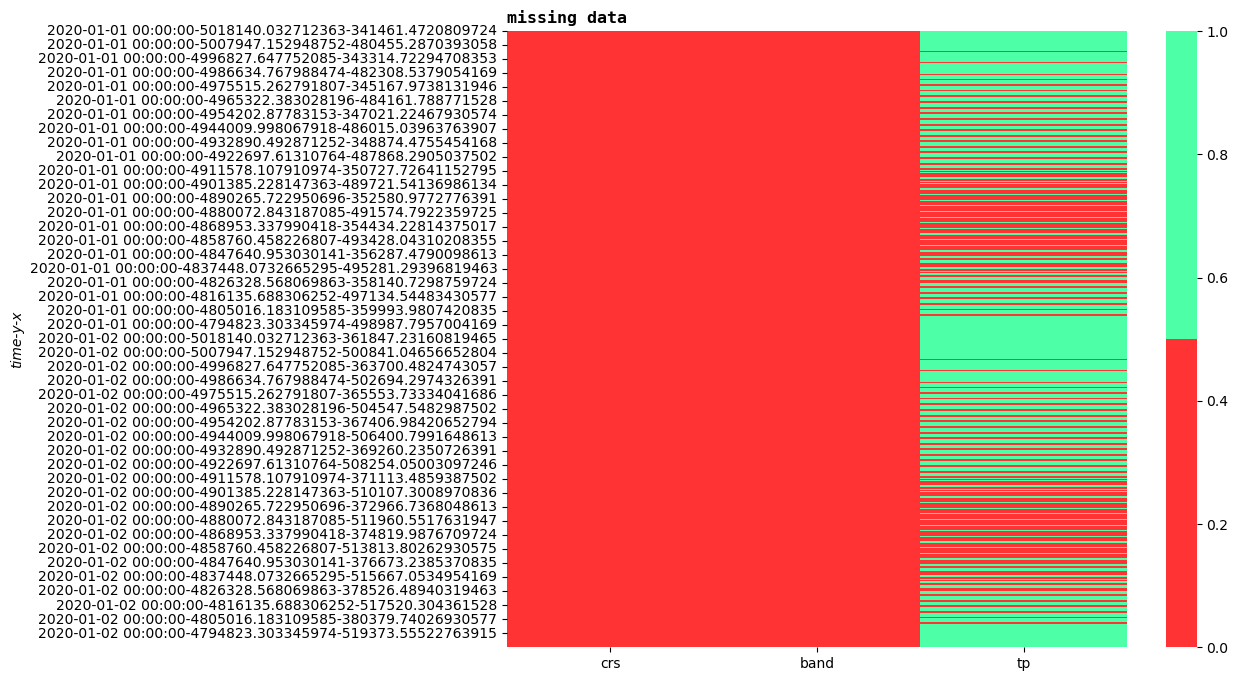

In [131]:
plt.figure(figsize=(10,8))
plt.title("missing data",
          fontsize='large',
          loc='left',
          fontweight='bold',
          family='monospace')
plt.xlabel('collumns name', fontweight='bold', loc='left')
plt.ylabel('Data point', style='italic', loc='bottom')


cols = df_ep.columns
colours = ['#ff3333', '#4dffa6']
sns.heatmap(df_ep[cols].isna(), cmap=sns.color_palette(colours))

<AxesSubplot:>

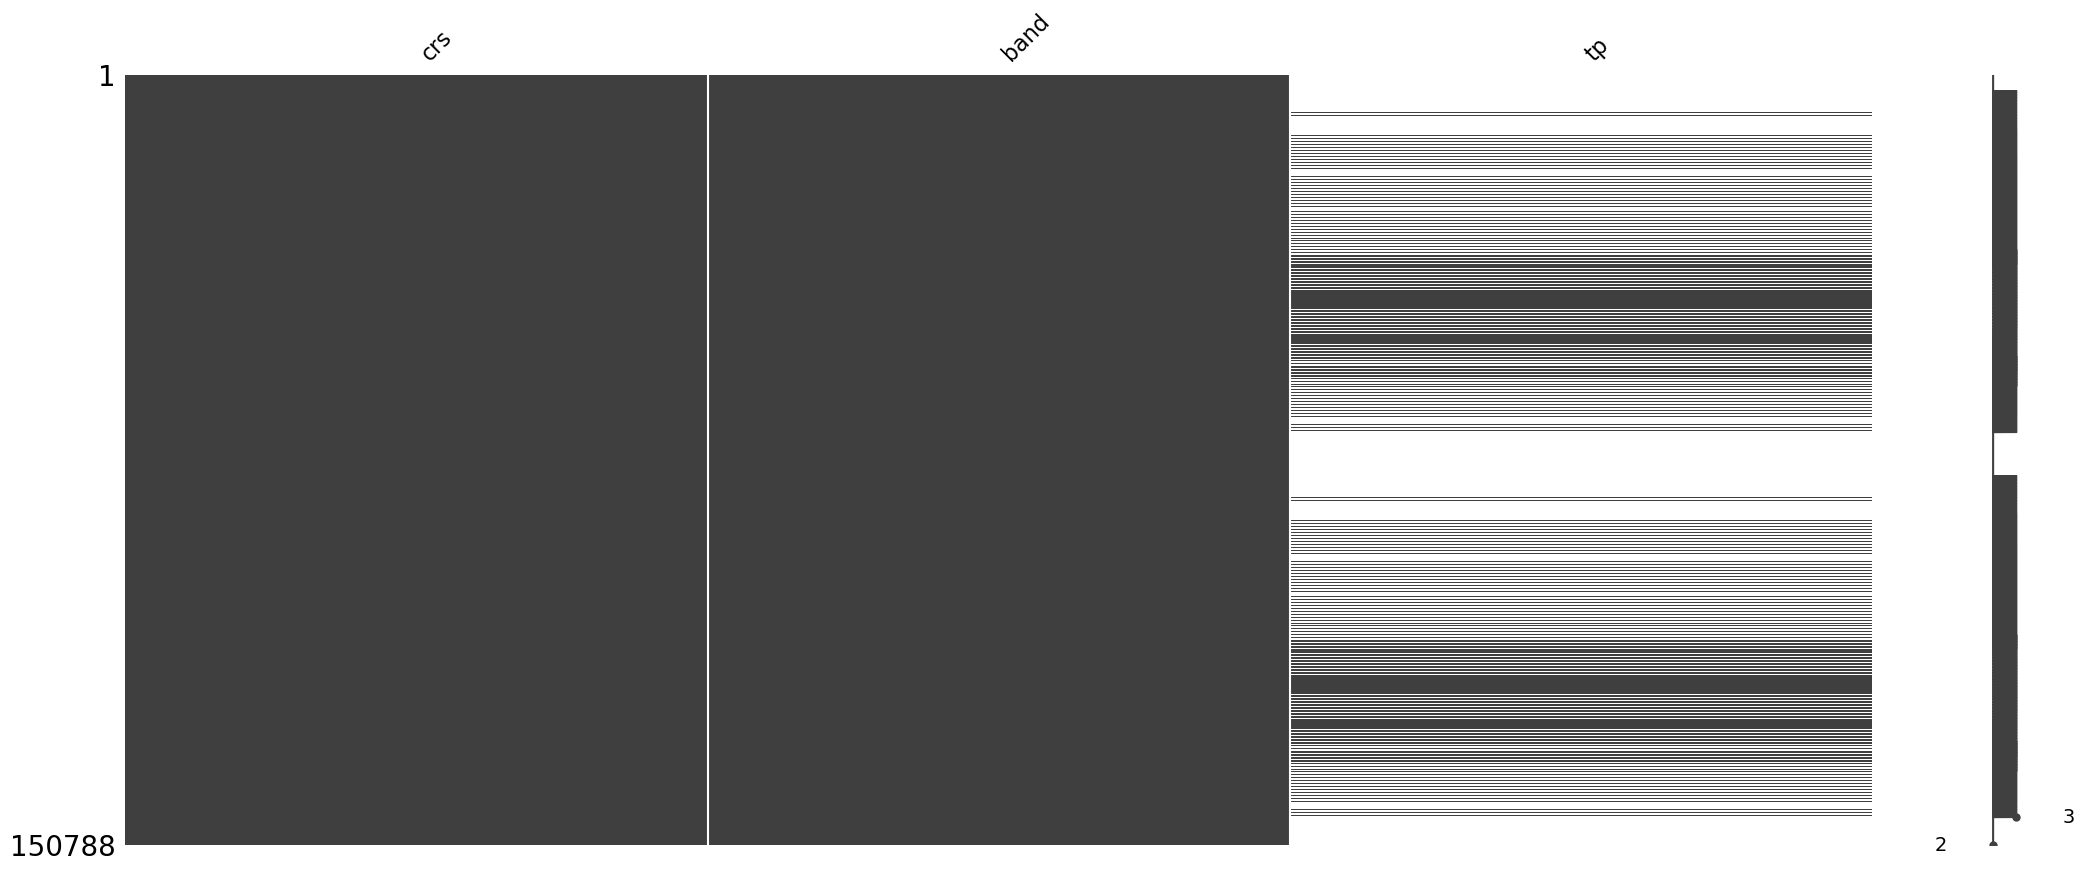

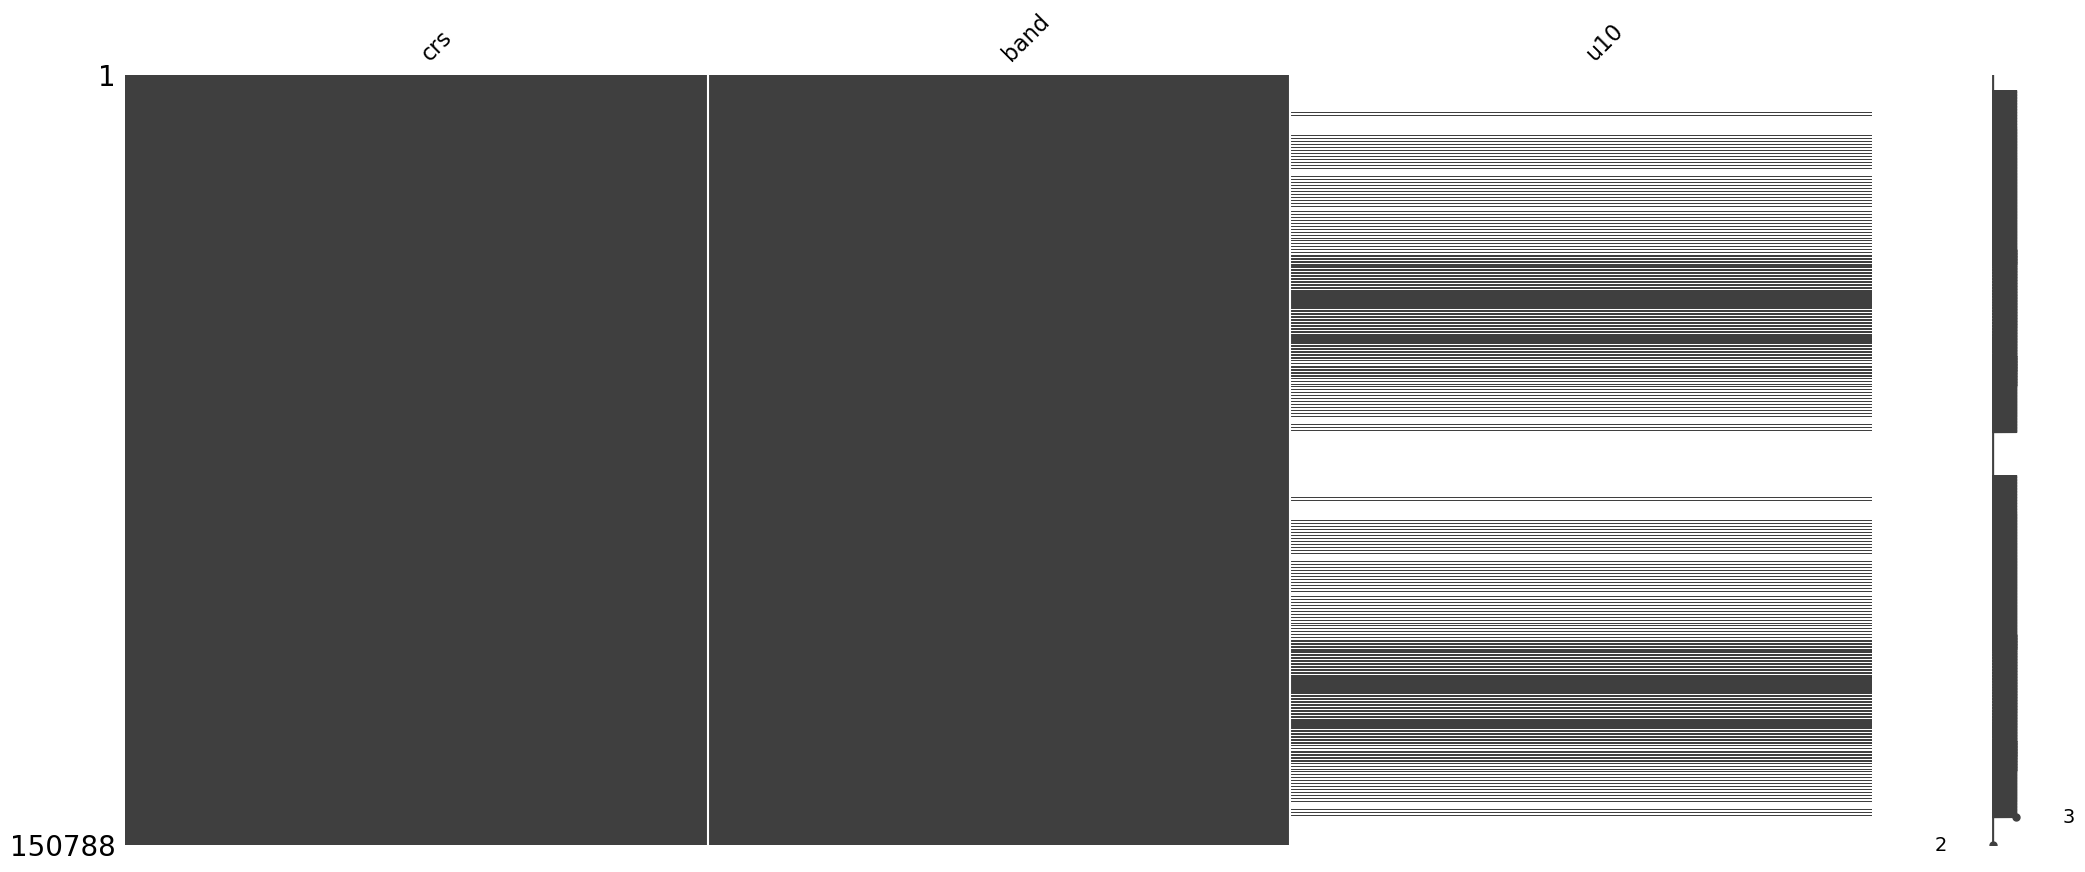

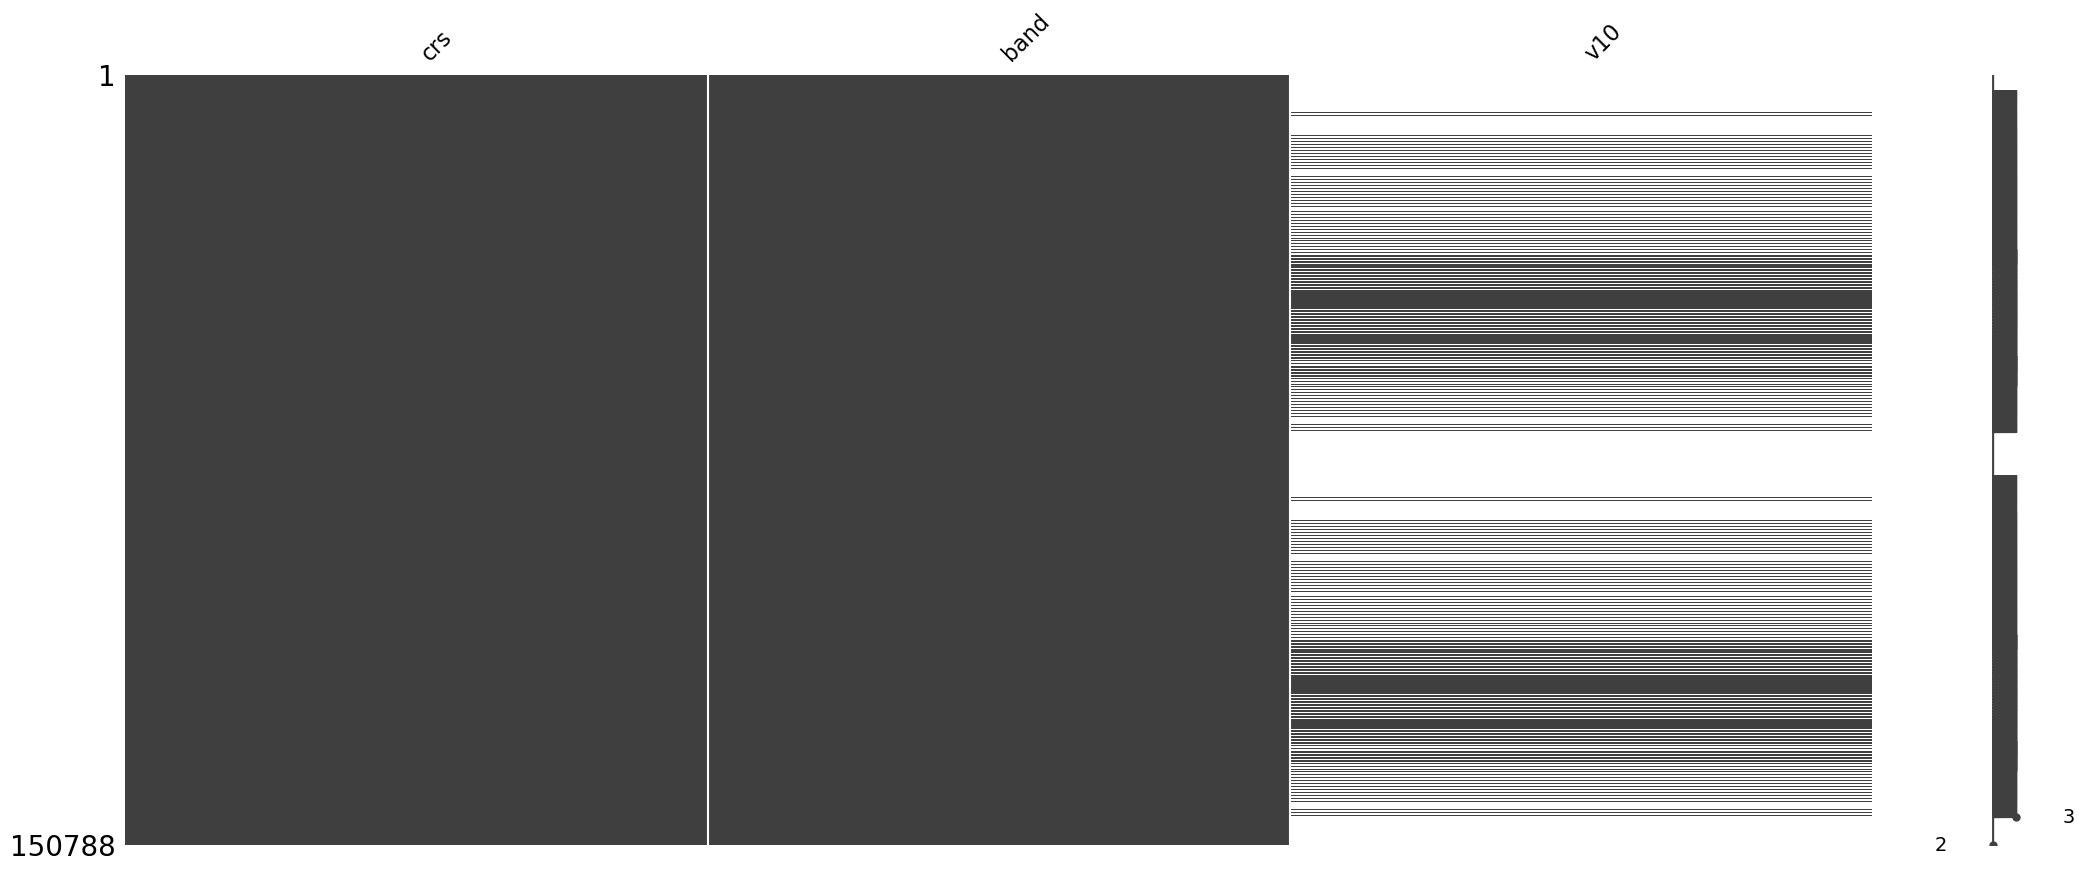

In [133]:
msno.matrix(df_ep)
msno.matrix(df_u10)
msno.matrix(df_v10)

In [134]:
df_ep.value_counts(dropna=False)

crs  band  tp          
0    1     NaN             92188
           0.000000e+00    26400
           9.313226e-07    23429
           9.313226e-07     2064
           9.313226e-07     1674
                           ...  
           1.146775e-06        1
           1.147198e-06        1
           1.148024e-06        1
           1.148042e-06        1
           1.497279e-06        1
Length: 2564, dtype: int64

## By rows

### EVI

In [124]:
print(datacube.transpose().head())
print(datacube.head())

<xarray.Dataset>
Dimensions:            (x: 5, y: 5, time: 2)
Coordinates:
  * x                  (x) float64 3.415e+05 3.424e+05 ... 3.442e+05 3.452e+05
  * y                  (y) float64 5.018e+06 5.017e+06 ... 5.015e+06 5.014e+06
    crs                int32 0
  * time               (time) object 2020-01-01 00:00:00 2020-01-02 00:00:00
    band               int32 1
Data variables: (12/13)
    ET_500m            (x, y, time) float64 nan nan nan nan ... nan nan nan nan
    Fpar_500m          (x, y, time) float64 nan nan nan nan ... nan nan nan nan
    spatial_ref        int32 0
    density            (x, y) float32 nan nan nan nan nan ... nan nan nan nan
    u10                (x, y, time) float64 nan nan nan nan ... nan nan nan nan
    v10                (x, y, time) float64 nan nan nan nan ... nan nan nan nan
    ...                 ...
    tp                 (x, y, time) float64 nan nan nan nan ... nan nan nan nan
    First_Day          (x, y, time) float64 nan nan nan nan ... nan

<AxesSubplot:>

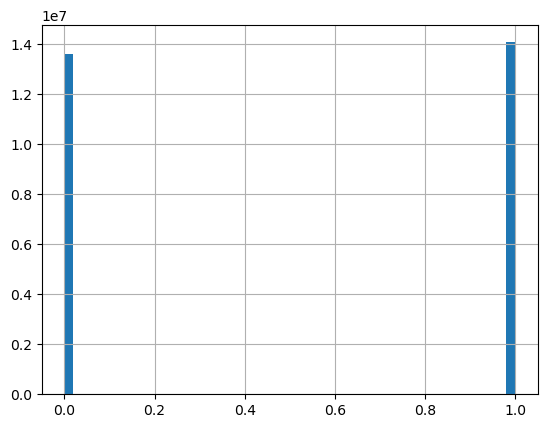

In [46]:
missing_by_row = df_evi.isna().sum(axis='columns')
missing_by_row.hist(bins=50)

## What to do with it ?

### drop collumn ?
This technique is straightforward. We drop the entire column or feature with missing data, which will certainly cause a loss of information. So we should only perform this when we are sure that the missing data is not informative. Otherwise, we should consider other solutions

### drop rows ?
We can drop the entire row with missing data like the first technique. Again, please be aware of the loss of information when removing rows.

If we only want to drop the rows with many missing values, we can do it similarly to the previous technique.

### imput the missing with constant values
Instead of dropping data, we can also replace the missing. An easy method is to impute the missing with constant values.

### imput the missing with statistics
Besides constants, we can also impute the missing values with statistics.

# Irregular data (outliers)
Outliers are data that is distinct from other observations. They could bias our data analysis results, providing a misleading representation of the data. Outliers could be real outliers or mistakes.

First, let’s look at kurtosis. Kurtosis is a statistical measure of ‘tailedness’. The higher kurtosis is often linked to the greater extremity of deviations (or outliers) in the data. So this is a single statistic to detect potential outliers.

crs                  0.000000
band                 0.000000
_1_km_16_days_EVI    0.014691
dtype: float64
count    74037.000000
mean         0.201399
std          0.126069
min         -0.154900
25%          0.155981
50%          0.238481
75%          0.284700
max          0.575200
Name: _1_km_16_days_EVI, dtype: float64


array([        nan,  0.2911    , -0.0165    , ..., -0.092175  ,
       -0.09521875, -0.069275  ])

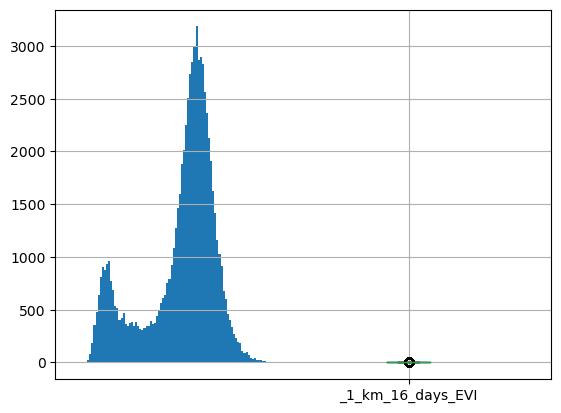

In [80]:
print(df_evi.kurt(numeric_only=True))
print(df_evi["_1_km_16_days_EVI"].describe())
df_evi['_1_km_16_days_EVI'].hist(bins=100)
df_evi.boxplot(column=['_1_km_16_days_EVI'])
df_evi['_1_km_16_days_EVI'].unique()

crs          0.000000
band         0.000000
Fpar_500m    7.262836
dtype: float64
count    7.441800e+04
mean     5.329856e-01
std      4.786092e-01
min     -2.168404e-19
25%      3.318750e-01
50%      4.591699e-01
75%      5.960937e-01
max      2.540000e+00
Name: Fpar_500m, dtype: float64


array([       nan, 1.32875001, 0.53111112, ..., 0.04926587, 0.00332031,
       0.00153509])

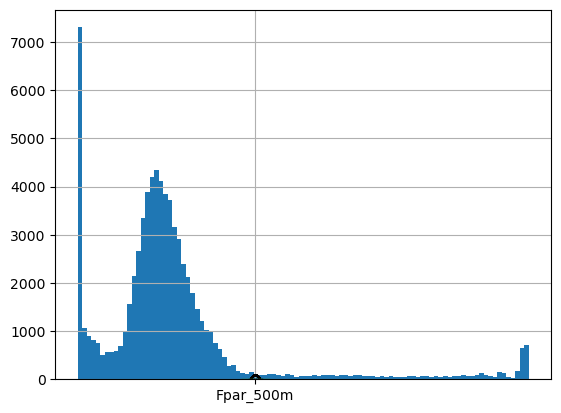

In [79]:
print(df_lai.kurt(numeric_only=True))
print(df_lai["Fpar_500m"].describe())
df_lai['Fpar_500m'].hist(bins=100)
df_lai.boxplot(column=['Fpar_500m'])
df_lai['Fpar_500m'].unique()

crs        0.000000
band       0.000000
ET_500m   -0.302051
dtype: float64
count    74484.000000
mean       874.402019
std       1171.396573
min          4.920313
25%          8.512500
50%        211.110153
75%       1488.013641
max       3276.600098
Name: ET_500m, dtype: float64


array([          nan, 3276.5       , 3276.48852539, ..., 3058.60662842,
       1097.85418701, 2867.9203186 ])

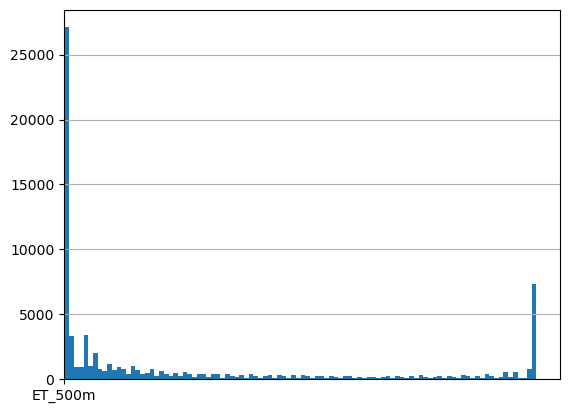

In [78]:
print(df_evap.kurt(numeric_only=True))
print(df_evap["ET_500m"].describe())
df_evap['ET_500m'].hist(bins=100)
df_evap.boxplot(column=['ET_500m'])
df_evap['ET_500m'].unique()

crs     0.000000
band    0.000000
u10    -0.501276
dtype: float64
count    58600.000000
mean        -0.466938
std          0.833794
min         -1.878088
25%         -1.150669
50%         -0.628900
75%          0.197419
max          2.743514
Name: u10, dtype: float64


array([        nan, -0.55552184, -0.52688337, ...,  1.76555131,
        1.79072143,  1.81589154])

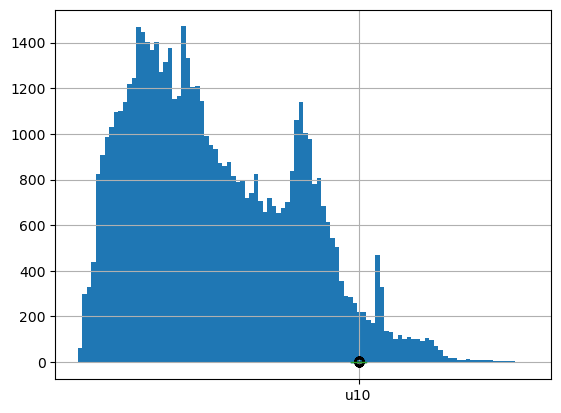

In [77]:
print(df_u10.kurt(numeric_only=True))
print(df_u10["u10"].describe())
df_u10['u10'].hist(bins=100)
df_u10.boxplot(column=['u10'])
df_u10['u10'].unique()

crs     0.000000
band    0.000000
v10    -0.571712
dtype: float64
count    58600.000000
mean        -1.022955
std          0.549046
min         -1.995283
25%         -1.473009
50%         -1.104246
75%         -0.627037
max          0.446227
Name: v10, dtype: float64


array([        nan,  0.15406444,  0.13859324, ..., -0.12654806,
       -0.10688917, -0.08723028])

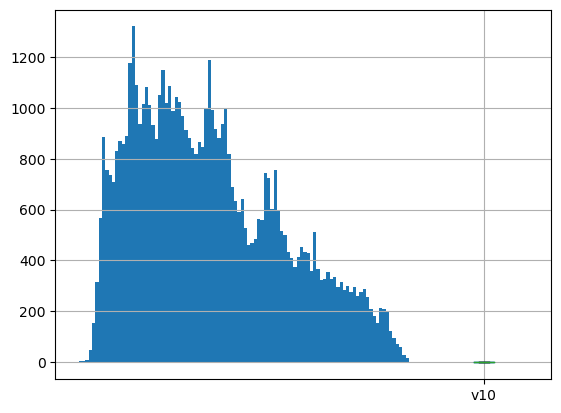

In [71]:
print(df_v10.kurt(numeric_only=True))
print(df_v10["v10"].describe())
df_v10['v10'].hist(bins=100)
df_v10.boxplot(column=['v10'])
df_v10['v10'].unique()

crs     0.000000
band    0.000000
t2m    -0.237836
dtype: float64
count    58600.000000
mean       273.557719
std          2.686323
min        266.159330
25%        271.757292
50%        273.643887
75%        275.350915
max        281.266826
Name: t2m, dtype: float64


array([         nan, 266.48674046, 266.59551892, ..., 279.02411518,
       279.08338674, 279.14265831])

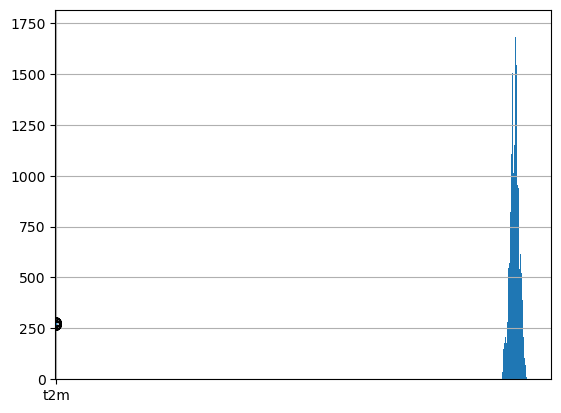

In [76]:
print(df_t2m.kurt(numeric_only=True))
print(df_t2m["t2m"].describe())
df_t2m['t2m'].hist(bins=100)
df_t2m.boxplot(column=['t2m'])
df_t2m['t2m'].unique()

crs      0.000000
band     0.000000
tp      13.576549
dtype: float64
count    5.860000e+04
mean     5.800914e-07
std      6.872853e-07
min      0.000000e+00
25%      0.000000e+00
50%      9.313226e-07
75%      9.313226e-07
max      8.759348e-06
Name: tp, dtype: float64


array([           nan, 0.00000000e+00, 2.24918481e-09, ...,
       7.67076210e-06, 8.21505521e-06, 8.75934832e-06])

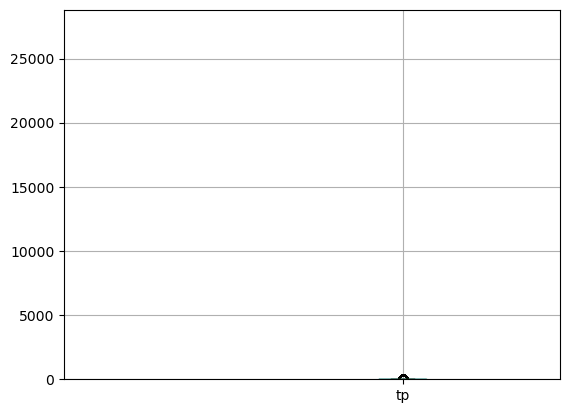

In [75]:
print(df_ep.kurt(numeric_only=True))
print(df_ep["tp"].describe())
df_ep['tp'].hist(bins=100)
df_ep.boxplot(column=['tp'])
df_ep['tp'].unique()

crs           0.000000
band          0.000000
First_Day    26.756789
dtype: float64
count    64204.000000
mean       332.032659
std         52.757919
min         -2.000000
25%        336.338710
50%        344.000000
75%        347.500000
max        365.000000
Name: First_Day, dtype: float64


array([         nan, 185.5       , 362.5       , ..., 336.83870968,
       251.67741935, 336.59677419])

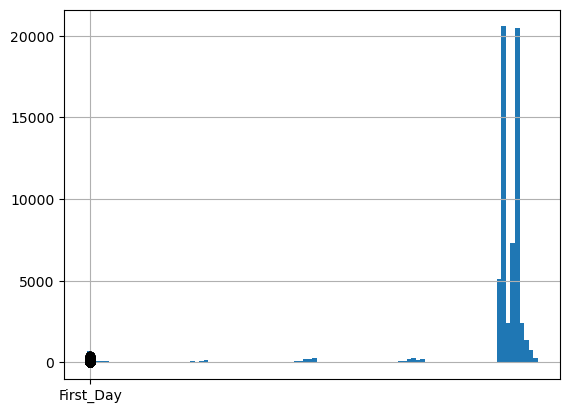

In [74]:
print(df_firstday.kurt(numeric_only=True))
print(df_firstday["First_Day"].describe())
df_firstday['First_Day'].hist(bins=100)
df_firstday.boxplot(column=['First_Day'])
df_firstday['First_Day'].unique()

crs          0.000000
band         0.000000
Last_Day    51.168911
dtype: float64
count    64204.000000
mean        49.506820
std          6.208245
min         -2.000000
25%         49.750000
50%         50.758065
75%         51.500000
max         53.838710
Name: Last_Day, dtype: float64


array([        nan, 38.75      , 46.        , ..., 37.67741935,
       51.44354839, 38.41935484])

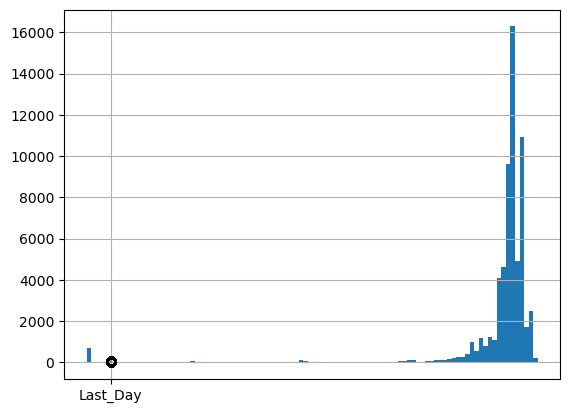

In [73]:
print(df_lastday.kurt(numeric_only=True))
print(df_lastday["Last_Day"].describe())
df_lastday['Last_Day'].hist(bins=100)
df_lastday.boxplot(column=['Last_Day'])
df_lastday['Last_Day'].unique()

crs           0.000000
band          0.000000
Burn_Date    65.931431
dtype: float64
count    64204.000000
mean        -0.029297
std          0.223476
min         -2.000000
25%          0.000000
50%          0.000000
75%          0.000000
max          0.000000
Name: Burn_Date, dtype: float64


array([ nan,  0. , -1. , -0.5, -0.5, -0.5, -0.5, -0.5, -0.5, -0.5, -0.5,
       -0.5, -0.5, -1. , -1.5, -1.5, -2. , -1. , -1. , -1. , -0.5, -0.5,
       -1. , -1.5, -1.5, -1.5, -0.5, -0.5, -1.5, -1. , -1.5, -1.5, -0.5,
       -1.5, -1.5, -1. , -0.5, -0.5, -0.5, -0.5, -1.5, -1.5, -0.5, -0.5])

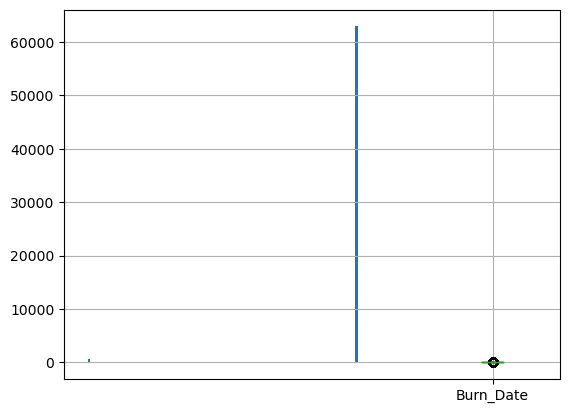

In [70]:
print(df_burndate.kurt(numeric_only=True))
print(df_burndate["Burn_Date"].describe())
df_burndate['Burn_Date'].hist(bins=100)
df_burndate.boxplot(column=['Burn_Date'])
df_burndate['Burn_Date'].unique()

crs          0.000000
band         0.000000
FireMask    26.578471
dtype: float64
count    75302.000000
mean         4.933923
std          0.326445
min          3.000000
25%          5.000000
50%          5.000000
75%          5.000000
max          8.000000
Name: FireMask, dtype: float64


array([  nan, 4.   , 5.   , 3.   , 7.   , 8.   , 4.875, 4.125, 3.875,
       4.75 , 3.25 , 5.375, 3.125, 5.25 , 7.125, 7.625, 6.75 ])

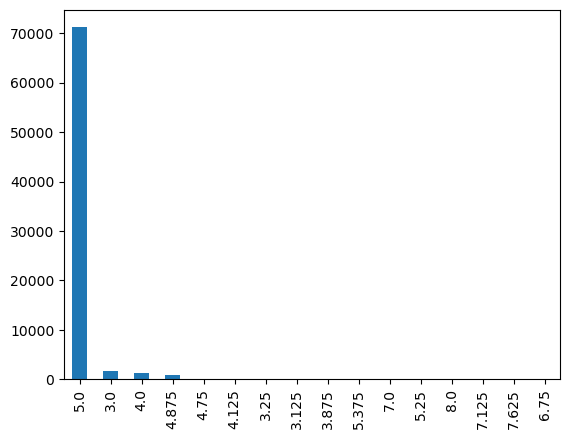

In [69]:
print(df_firemask.kurt(numeric_only=True))
print(df_firemask["FireMask"].describe())
#df_firemask['FireMask'].hist(bins=100)
#df_firemask.boxplot(column=['FireMask'])
df_firemask['FireMask'].value_counts().plot(kind='bar')
df_firemask['FireMask'].unique()

crs          0.000000
band         0.000000
density    314.135742
dtype: float64
count    36557.000000
mean       151.771835
std        708.884460
min          0.013098
25%          3.449855
50%         12.152522
75%         58.066124
max      23752.996094
Name: density, dtype: float64


array([        nan,   1.9390013,   3.6736822, ..., 722.1514   ,
        29.484118 , 825.1966   ], dtype=float32)

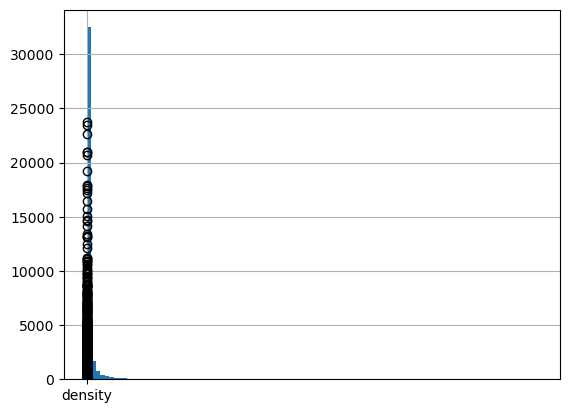

In [72]:
print(df_density.kurt(numeric_only=True))
print(df_density["density"].describe())
df_density['density'].hist(bins=100)
df_density.boxplot(column=['density'])
df_density['density'].unique()

# Unnecessary data
All the data included in the analysis should support the project’s goal. We consider the data to be unnecessary when it doesn’t add value. We’ll cover 3 main types of unnecessary data.

In [ ]:
print("---EVI---")
print(df_evi.equals(df_lai))
print(df_evi.equals(df_evap))
print(df_evi.equals(df_u10))
print(df_evi.equals(df_v10))
print(df_evi.equals(df_t2m))
print(df_evi.equals(df_ep))
print(df_evi.equals(df_firstday))
print(df_evi.equals(df_lastday))
print(df_evi.equals(df_burndate))
print(df_evi.equals(df_firemask))
print(df_evi.equals(df_density))

print("---LAI---")
print(df_lai.equals(df_evap))
print(df_lai.equals(df_u10))
print(df_lai.equals(df_v10))
print(df_lai.equals(df_t2m))
print(df_lai.equals(df_ep))
print(df_lai.equals(df_firstday))
print(df_lai.equals(df_lastday))
print(df_lai.equals(df_burndate))
print(df_lai.equals(df_firemask))
print(df_lai.equals(df_density))

print("---evap---")
print(df_evap.equals(df_u10))
print(df_evap.equals(df_v10))
print(df_evap.equals(df_t2m))
print(df_evap.equals(df_ep))
print(df_evap.equals(df_firstday))
print(df_evap.equals(df_lastday))
print(df_evap.equals(df_burndate))
print(df_evap.equals(df_firemask))
print(df_evap.equals(df_density))

print("---u10---")
print(df_u10.equals(df_v10))
print(df_u10.equals(df_t2m))
print(df_u10.equals(df_ep))
print(df_u10.equals(df_firstday))
print(df_u10.equals(df_lastday))
print(df_u10.equals(df_burndate))
print(df_u10.equals(df_firemask))
print(df_u10.equals(df_density))

print("---v10---")
print(df_v10.equals(df_t2m))
print(df_v10.equals(df_ep))
print(df_v10.equals(df_firstday))
print(df_v10.equals(df_lastday))
print(df_v10.equals(df_burndate))
print(df_v10.equals(df_firemask))
print(df_v10.equals(df_density))

print("---t2m---")
print(df_t2m.equals(df_ep))
print(df_t2m.equals(df_firstday))
print(df_t2m.equals(df_lastday))
print(df_t2m.equals(df_burndate))
print(df_t2m.equals(df_firemask))
print(df_t2m.equals(df_density))

print("---ep---")
print(df_ep.equals(df_firstday))
print(df_ep.equals(df_lastday))
print(df_ep.equals(df_burndate))
print(df_ep.equals(df_firemask))
print(df_ep.equals(df_density))

print("---firstday---")
print(df_firstday.equals(df_lastday))
print(df_firstday.equals(df_burndate))
print(df_firstday.equals(df_firemask))
print(df_firstday.equals(df_density))

print("--lastday---")
print(df_lastday.equals(df_burndate))
print(df_lastday.equals(df_firemask))
print(df_lastday.equals(df_density))

print("---burndate---")
print(df_burndate.equals(df_firemask))
print(df_burndate.equals(df_density))

print("---firemask---")
print(df_firemask.equals(df_density))

# Inconsistent data
It is crucial to have the dataset follow specific standards. There could be different inconsistent data that needs to be cleaned and we’ll cover 4 common ones. Please note that the actual data may be even messier, be creative when cleaning it!

None in our case because we only have integer data

In [135]:
datacube.to_dataframe()

crs  ET_500m  Fpar_500m  band  \
x             y            time                                                 
341461.472081 5.018140e+06 2020-01-01 00:00:00    0      NaN        NaN     1   
                           2020-01-02 00:00:00    0      NaN        NaN     1   
              5.017213e+06 2020-01-01 00:00:00    0      NaN        NaN     1   
                           2020-01-02 00:00:00    0      NaN        NaN     1   
              5.016287e+06 2020-01-01 00:00:00    0      NaN        NaN     1   
...                                             ...      ...        ...   ...   
616669.225698 4.786484e+06 2020-01-02 00:00:00    0      NaN        NaN     1   
              4.785557e+06 2020-01-01 00:00:00    0      NaN        NaN     1   
                           2020-01-02 00:00:00    0      NaN        NaN     1   
              4.784630e+06 2020-01-01 00:00:00    0      NaN        NaN     1   
                           2020-01-02 00:00:00    0      NaN        NaN     1   

                                                spatial_ref  density  u10  \
x             y            time                                             
341461.472081 5.018140e+06 2020-01-01 00:00:00            0      NaN  NaN   
                           2020-01-02 00:00:00            0      NaN  NaN   
              5.017213e+06 2020-01-01 00:00:00            0      NaN  NaN   
                           2020-01-02 00:00:00            0      NaN  NaN   
              5.016287e+06 2020-01-01 00:00:00            0      NaN  NaN   
...                                                     ...      ...  ...   
616669.225698 4.786484e+06 2020-01-02 00:00:00            0      NaN  NaN   
              4.785557e+06 2020-01-01 00:00:00            0      NaN  NaN   
                           2020-01-02 00:00:00            0      NaN  NaN   
              4.784630e+06 2020-01-01 00:00:00            0      NaN  NaN   
                           2020-01-02 00:00:00            0      NaN  NaN   

                                                v10  t2m  tp  First_Day  \
x             y            time                                           
341461.472081 5.018140e+06 2020-01-01 00:00:00  NaN  NaN NaN        NaN   
                           2020-01-02 00:00:00  NaN  NaN NaN        NaN   
              5.017213e+06 2020-01-01 00:00:00  NaN  NaN NaN        NaN   
                           2020-01-02 00:00:00  NaN  NaN NaN        NaN   
              5.016287e+06 2020-01-01 00:00:00  NaN  NaN NaN        NaN   
...                                             ...  ...  ..        ...   
616669.225698 4.786484e+06 2020-01-02 00:00:00  NaN  NaN NaN        NaN   
              4.785557e+06 2020-01-01 00:00:00  NaN  NaN NaN        NaN   
                           2020-01-02 00:00:00  NaN  NaN NaN        NaN   
              4.784630e+06 2020-01-01 00:00:00  NaN  NaN NaN        NaN   
                           2020-01-02 00:00:00  NaN  NaN NaN        NaN   

                                                Last_Day  Burn_Date  FireMask  \
x             y            time                                                 
341461.472081 5.018140e+06 2020-01-01 00:00:00       NaN        NaN       NaN   
                           2020-01-02 00:00:00       NaN        NaN       NaN   
              5.017213e+06 2020-01-01 00:00:00       NaN        NaN       NaN   
                           2020-01-02 00:00:00       NaN        NaN       NaN   
              5.016287e+06 2020-01-01 00:00:00       NaN        NaN       NaN   
...                                                  ...        ...       ...   
616669.225698 4.786484e+06 2020-01-02 00:00:00       NaN        NaN       NaN   
              4.785557e+06 2020-01-01 00:00:00       NaN        NaN       NaN   
                           2020-01-02 00:00:00       NaN        NaN       NaN   
              4.784630e+06 2020-01-01 00:00:00       NaN        NaN       NaN   
                           2020-01-02 00:00: